In [1]:
#!/usr/bin/env python

import numpy as np
import os
from shapely import geometry
import tkinter
import matplotlib.pyplot as plt
from netCDF4 import Dataset

from gnssr.tds.tds_data import *
from gnssr.utils import *
from gnssr.targets import *



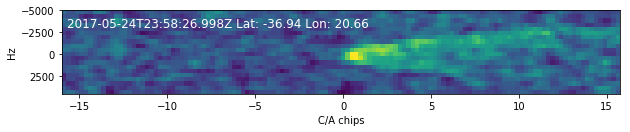

AttributeError: 'tds_data' object has no attribute 'index_l2b'

In [37]:
# Di Simone
'''
file_root_name = 'raw/L1B/2017-05-31-H18'
target = targets['hibernia']
group = '000095'
index = 100
'''

file_root_name = '2017-05-25-H00'
target = targets['hibernia']
group = '000105'
index = 155

tds = tds_data(file_root_name, group, index)
tds.plot_ddm()

print(tds.l2b.variables['WindSpeed'][tds.index_l2b].data)
print(tds.peak_power())

r_spx = tds.metagrp.groups[tds.group].variables['SpecularPointPositionX'][tds.index]
print(r_spx)

In [ ]:
print(tds.rootgrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index].data)
print(tds.metagrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index].data)

In [3]:
code_delay_spacing_samples_between_pixels = tds.metagrp.groups[tds.group]
print(code_delay_spacing_samples_between_pixels)

<class 'netCDF4._netCDF4.Group'>
group /000105:
    TrackID: 105
    DataTag: 18
    PtrId: 1808
    ReflectionChannelNumber: 1
    MasterChannelNumber: 4
    PRN: 11
    SVN: 46
    GnssBlock: 5
    GnssBlock_units: SSTL.ZTCDataMergeTools.TransmitterCorrections+GPSBlockEnum>0:Unknown,1:BlockI,2:BlockII,3:BlockIIA,4:BlockIIR,5:BlockIIR_A,6:BlockIIR_B,7:BlockIIR_M,8:BlockIIF
    FrontEnd: 1
    FrontEnd_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+FrontEndEnum>0:ZenithL1_DF,1:NadirL1,2:ZenithL1_CLAP,3:ZenithL1_CAP,4:Unknown5,5:Unknown6,6:ZenithL2_DF,7:NadirL2,8:Unknown
    SignalType: 1
    SignalType_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+SignalTypeEnum>0:NO_SIGNAL,1:GPS_L1
    SamplingFrequency: 16367000.0
    AllocationMode: 1
    AllocationMode_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+AllocationModeEnum>0:Manual,1:Auto,2:Unknown
    TrackingMode: 2
    TrackingMode_units: SSTL.ZTCStreamProcessing.DDMTrackHeader+TrackingModeEnum>0:Idle,1:DirectSignalOverride,

In [4]:
'''

    ddmPeak = metadata.trackVars(:, metadata.trackVarNames.DDMOutputNumericalScaling);
    noiseEstimate = metadata.trackVars(:, metadata.trackVarNames.MeanNoiseBox);
    systemGainBB_dB = metadata.trackVars(:, metadata.trackVarNames.SystemGainBB) + metadata.trackVars(:, metadata.trackVarNames.SystemGainBBComp);
    systemGainExtRef_dB = metadata.trackVars(:, metadata.trackVarNames.SystemGainExtRef) + metadata.trackVars(:, metadata.trackVarNames.SystemGainExtRefComp);
    systemGainLin = zeros(size(systemGainBB_dB));
    for idx = 1:metadata.trackLength
        if metadata.trackVars(idx, metadata.trackVarNames.ReferenceType) == 1 %Blackbody
            systemGainLin(idx) = 10.^(systemGainBB_dB(idx) / 10);
        elseif metadata.trackVars(idx, metadata.trackVarNames.ReferenceType) == 2 %ExtRef
            systemGainLin(idx) = 10.^(systemGainExtRef_dB(idx) / 10);
        elseif metadata.trackVars(:, metadata.trackVarNames.ReferenceType) == 3 %Both available
            systemGainLin(idx) = 10.^(systemGainBB_dB(idx) / 10);
        else
            systemGainLin(idx) = nan;
        end
    end
    inputCableGainLin = 10.^(-0.6/10);

    peakReceivedPowerLin = calcReceivedPowerSMN(ddmPeak, noiseEstimate, systemGainLin, inputCableGainLin);
    peakReceivedPower_dB = 10*log10(peakReceivedPowerLin); %dBW




    receivedPower = (ddmPixel - noiseEstimate) ...
                        ./ systemGain ...
                        ./ inputCableGainLin;
'''
'''
file_root_name = 'raw/L1B/2017-05-31-H18'
target = targets['hibernia']
group = '000095'
index = 100
'''

file_root_name = 'raw/L1B/2017-11-11-H18'
target = targets['hibernia']
group = '000015'
index = 350

tds = tds_data(file_root_name, group, index)
tds.find_index_meta()
    
#print(tds.metagrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index].data)
ddmPeak = tds.metagrp.groups[tds.group].variables['DDMOutputNumericalScaling'][tds.index].data
noiseEstimate = tds.metagrp.groups[tds.group].variables['MeanNoiseBox'][tds.index].data

systemGainBB_dB = tds.metagrp.variables['SystemGainBB'][tds.index_meta].data + tds.metagrp.variables['SystemGainBBComp'][tds.index_meta].data
systemGainExtRef_dB = tds.metagrp.variables['SystemGainExtRef'][tds.index_meta].data + tds.metagrp.variables['SystemGainExtRefComp'][tds.index_meta].data

referenceType = tds.metagrp.variables['ReferenceType'][tds.index_meta].data
systemGainLin = 0
if (referenceType == 1) :
    systemGainLin = 10**(systemGainBB_dB/10)
elif (referenceType == 2) :
    systemGainLin = 10**(systemGainExtRef_dB/10)
elif (referenceType == 3) :
    systemGainLin = 10**(systemGainBB_dB/10)
else :
    print('No power data available')

inputCableGainLin = 10**(-0.6/10);

power = (ddmPeak - noiseEstimate)/systemGainLin/inputCableGainLin
print(power)


FileNotFoundError: [Errno 2] No such file or directory: b'/home/woowapdabug/projects/thesis/py_venv_gnssr/src/gnssr/tds/raw/L1B/raw/L1B/2017-11-11-H18-DDMs.nc'

In [6]:
file_root_name = '2017-05-25-H00'
target = targets['hibernia']
group = '000085'
index = 100

tds.set_group_index(group,index)

tds.l2b.variables['WindSpeed'][tds.index_l2b].data

AttributeError: 'tds_data' object has no attribute 'index_l2b'

In [7]:

tds.metagrp.groups['000075'].variables['SpecularPointPositionX'][200]

masked_array(data=-5046792.51086865,
             mask=False,
       fill_value=1e+20)

wind: 7.931153815009562


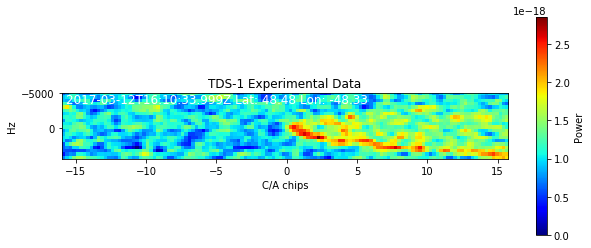

In [73]:
file_root_name = '2017-03-12-H18'
target = targets['hibernia']
group = '000035'
index = 675-30

tds = tds_data(file_root_name, group, index)

ddm_tds_0 = normalize(np.copy(tds.rootgrp.groups[group].variables['DDM'][tds.index].data)*tds.peak_power())    
# 1. Sea clutter estimation. 
# As target appear as bright spots, the initial estimation is based of the 
# composition of the minimum values for each pixel for the last n measurements
n = 30 
for i in range(1, n):
    #ddm_i = normalize(self.ddm_list[i])
    ddm_i = normalize(tds.rootgrp.groups[group].variables['DDM'][i].data*tds.peak_power())
    for row_i, row in enumerate(ddm_tds):
        for col_i, val in enumerate(row):
            val_i = ddm_i[row_i][col_i]
            val = ddm_tds[row_i][col_i]
            min,max = np.sort([val_i,val])
            ddm_tds[row_i][col_i] = 0.5*min +0.5*max

# Using the self.sea_clutter_0 as initial estimation a low pass filter that gives 
# more weight to the lower values is applied 
n = 30 
tau = 0.08
ddm_tds = np.copy(ddm_tds_0)
for i in range(1, n):
    ddm_i = normalize(tds.rootgrp.groups[group].variables['DDM'][i].data*tds.peak_power())
    for row_i, row in enumerate(ddm_tds):
        for col_i, val in enumerate(row):
            val_i = ddm_i[row_i][col_i]
            val = ddm_tds[row_i][col_i]
            #min,max = np.sort([val_i,val])
            #new_val = 0.7*min + 0.3*max;
            ddm_tds[row_i][col_i] = val + tau*(val_i - val)

# Plot TDS DDM sea clutter
tds.set_group_index(group, index)
r_sp, lat_sp, lon_sp = tds.find_sp();
datenum = tds.rootgrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index]

string = str(datenum_to_pytime(float(datenum))) \
    + ' Lat: ' + "{0:.2f}".format(tds.lat_sp_tds) \
    + ' Lon: ' + "{0:.2f}".format(tds.lon_sp_tds)

number_of_delay_pixels = tds.metagrp.groups[tds.group].NumberOfDelayPixels
number_of_doppler_pixels = tds.metagrp.groups[tds.group].NumberOfDopplerPixels

delay_start = tds.calculate_delay_increment_chips(0)
delay_end = tds.calculate_delay_increment_chips(number_of_delay_pixels-1)
doppler_start = tds.calculate_doppler_increment(-np.floor(number_of_doppler_pixels/2))
doppler_end = tds.calculate_doppler_increment(np.floor(number_of_doppler_pixels/2 - 0.5))

fig_tds, ax_tds = plt.subplots(1,figsize=(10, 4))
plt.title('TDS-1 Experimental Data')
plt.xlabel('C/A chips')
plt.ylabel('Hz')
contour_tds = ax_tds.imshow(normalize(tds.rootgrp.groups[tds.group].variables['DDM'][tds.index].data)*tds.peak_power(), cmap='jet', 
        extent=(delay_start, delay_end, doppler_end, doppler_start), 
        aspect=(number_of_doppler_pixels/number_of_delay_pixels)/np.abs(doppler_start/delay_start)
        )
t = plt.text(0.01, 0.85, string, {'color': 'w', 'fontsize': 12}, transform=ax_tds.transAxes)
cbar = fig_tds.colorbar(contour_tds, label='Power')

print('wind: {0}'.format(mean_wind))

In [74]:
class target_processor:

    def __init__(self):
        self.min_col = 60
        #self.max_col = 85
        self.max_col = 95
        self.ddm_list = []

    def cut_noise_region(self, ddm,ddm_ref,new_value=0):
        """
        For each pixel in ddm, replaces the pixel with new_value if the pixel 
        with same indeces in ddm_ref is less than 0.3
        cut_threshold is computed as the mean of the noise region of the ddm_ref 
        (from column 0 to 40)
        """
        ddm_cut = np.zeros(ddm.shape) + new_value
        cut_threshold = 0.15
        for row_i, row in enumerate(ddm_cut):
            for col_i, val in enumerate(row):
                if(col_i >= self.min_col and col_i <= self.max_col):
                    if(ddm_ref[row_i][col_i]>=cut_threshold):
                        ddm_cut[row_i][col_i] = ddm[row_i][col_i]
        return ddm_cut

    def process_ddm(self, ddm_raw):
        self.ddm_original = (ddm_raw) 

        n = 30 
        if len(self.ddm_list) < n :
            self.ddm_list.insert(0, self.ddm_original)
            return

        # 1. Sea clutter estimation. 
        # As target appear as bright spots, the initial estimation is based of the 
        # composition of the minimum values for each pixel for the last n measurements
        n = 30 
        self.sea_clutter_0 = self.ddm_list[0]
        for i in range(1, n):
            ddm_i = (self.ddm_list[i])
            self.sea_clutter_0 = (self.sea_clutter_0)
            for row_i, row in enumerate(self.sea_clutter_0):
                for col_i, val in enumerate(row):
                    val_i = ddm_i[row_i][col_i]
                    val = self.sea_clutter_0[row_i][col_i]
                    min,max = np.sort([val_i,val])
                    self.sea_clutter_0[row_i][col_i] = 0.5*min +0.5*max
        self.sea_clutter_0 = (self.sea_clutter_0)
        
        # Using the self.sea_clutter_0 as initial estimation a low pass filter that gives 
        # more weight to the lower values is applied 
        n = 30 
        tau = 0.08
        self.sea_clutter = np.array(self.sea_clutter_0)
        for i in range(1, n):
            ddm_i = (self.ddm_list[i])
            self.sea_clutter = (self.sea_clutter)
            for row_i, row in enumerate(self.sea_clutter):
                for col_i, val in enumerate(row):
                    val_i = ddm_i[row_i][col_i]
                    val = self.sea_clutter[row_i][col_i]
                    #min,max = np.sort([val_i,val])
                    #new_val = 0.7*min + 0.3*max;
                    self.sea_clutter[row_i][col_i] = val + tau*(val_i - val)
        self.sea_clutter = (self.sea_clutter)

        # Only the region of the wake is relevant for detection, so we cut the 
        # irrelevant region
        self.sea_clutter_cut = self.cut_noise_region(self.sea_clutter, self.sea_clutter)
        self.ddm_original_cut = self.cut_noise_region(self.ddm_original, self.sea_clutter)

        # 2. Sea clutter substracted Difference Map
        ddm_diff = self.ddm_original_cut - 0.85*self.sea_clutter_cut
        if (np.min(ddm_diff) < 0):
            ddm_diff = ddm_diff - np.min(ddm_diff)
        cut_value_fig = np.min(ddm_diff)
        ddm_diff_fig = self.cut_noise_region(ddm_diff,self.sea_clutter,cut_value_fig)
        ddm_diff = self.cut_noise_region(ddm_diff,self.sea_clutter)

        # 3. Over threshold detection
        ddm_detections = np.zeros(ddm_diff.shape)
        #threshold = 0.38
        threshold = 0.5
        print(np.max(ddm_diff))
        print(threshold)
        for row_i, row in enumerate(ddm_diff):
            for col_i, val in enumerate(row):
                if(col_i >= self.min_col and col_i <= self.max_col):
                    if(ddm_diff[row_i][col_i] >= threshold):
                        ddm_detections[row_i][col_i] = 1

        # Plotting
        """
        fig_original = plt.figure(figsize=(10, 4))
        im_original = plt.imshow(self.ddm_original, cmap='viridis', extent=(0,127,-10,9))
        plt.show(block=False)

        fig_self.sea_clutter = plt.figure(figsize=(10, 4))
        im_self.sea_clutter = plt.imshow(self.sea_clutter, cmap='viridis', extent=(0,127,-10,9))    
        plt.show(block=False)

        fig_sub = plt.figure(figsize=(10, 4))
        im_sub = plt.imshow(ddm_diff, cmap='viridis', extent=(0,127,-10,9))
        plt.show(block=False)

        fig_detections = plt.figure(figsize=(10, 4))
        im_detections = plt.imshow(ddm_detections, cmap='viridis', extent=(0,127,-10,9))
        plt.show(block=False)
        """

        """
        datenum = metagrp.groups[group].variables['IntegrationMidPointTime'][index]
        lat = metagrp.groups[group].variables['SpecularPointLat'][index]
        lon = metagrp.groups[group].variables['SpecularPointLon'][index]
        string = 'G: ' + group + ' I: ' + str(index) + ' - ' + \
                str(datenum) + ' - ' + str(datenum_to_pytime(float(datenum))) + ' - Lat: ' + \
                str(lat) + ' Lon: ' + str(lon) + '\n'
        t = plt.text(5, 5, string, {'color': 'w', 'fontsize': 12})
        """

        """
        # Plot with pause
        plt.draw()
        plt.pause(1) 
        input("<Hit Enter To Continue>")
        plt.close(fig_original)
        plt.close(fig_self.sea_clutter)
        plt.close(fig_sub)
        plt.close(fig_detections)
        plt.close(fig_labels)
        """

    def plot_targets():
        self.fig_labels, self.ax_labels = plt.subplots(1,figsize=(10, 4))
        [p.remove() for p in reversed(self.ax_labels.patches)] # Clear previous patches
        selfall_labels = label(ddm_detections)
        self.ax_labels.imshow(self.ddm_original, cmap='viridis')
        target_flag = False
        for region in regionprops(selfall_labels):
            target_flag = True
            minr, minc, maxr, maxc = region.bbox
            l = 1 
            rect = mpatches.Rectangle((minc-l, minr-l), maxc - minc + 2*l-1, maxr - minr + 2*l - 1, fill=False, edgecolor='red', linewidth=2)
            self.ax_labels.add_patch(rect)

        plt.draw()
        plt.pause(0.0001)



0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.5


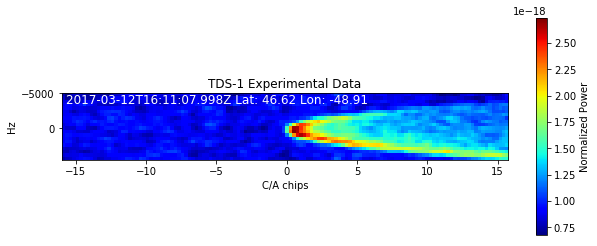

In [75]:
from gnssr.simulator.simulation_configuration import *

sim_config = simulation_configuration()
delay_chip = sim_config.delay_chip
# Really good
#sim_config.u_10 = 4
#sim_config.phi_0 = 35*np.pi/180
#sim_config.u_10 = 4
#sim_config.phi_0 = 38*np.pi/180
sim_config.u_10 = 3.04
sim_config.phi_0 = -83*np.pi/180

file_root_name = '2015-04-01-H00'
target = targets['hibernia']
group = '000095'
index = 415

file_root_name = '2017-03-12-H18'
target = targets['hibernia']
group = '000035'
index = 675

tds = tds_data(file_root_name, group, index)

# Sea clutter estimation. 
p = target_processor();
for i in range(index - 50, index + 5):
    tds.set_group_index(group,i)
    ddm = normalize(tds.rootgrp.groups[group].variables['DDM'][i].data)*tds.peak_power()
    p.process_ddm(ddm)

# Plot TDS DDM sea clutter

datenum = tds.rootgrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index]

string = str(datenum_to_pytime(float(datenum))) \
    + ' Lat: ' + "{0:.2f}".format(tds.lat_sp_tds) \
    + ' Lon: ' + "{0:.2f}".format(tds.lon_sp_tds)

number_of_delay_pixels = tds.metagrp.groups[tds.group].NumberOfDelayPixels
number_of_doppler_pixels = tds.metagrp.groups[tds.group].NumberOfDopplerPixels

delay_start = tds.calculate_delay_increment_chips(0)
delay_end = tds.calculate_delay_increment_chips(number_of_delay_pixels-1)
doppler_start = tds.calculate_doppler_increment(-np.floor(number_of_doppler_pixels/2))
doppler_end = tds.calculate_doppler_increment(np.floor(number_of_doppler_pixels/2 - 0.5))

delay_increment_start = sim_config.delay_increment_start 
delay_increment_end = sim_config.delay_increment_end 
delay_resolution = sim_config.delay_resolution

sim_config.delay_increment_start = delay_start*delay_chip + 2*delay_resolution
sim_config.delay_increment_end = delay_end*delay_chip
sim_config.doppler_increment_start = -5000
sim_config.doppler_increment_end = 5000

doppler_increment_start = sim_config.doppler_increment_start
doppler_increment_end = sim_config.doppler_increment_end
doppler_resolution = sim_config.doppler_resolution

fig_tds, ax_tds = plt.subplots(1,figsize=(10, 4))
plt.title('TDS-1 Experimental Data')
plt.xlabel('C/A chips')
plt.ylabel('Hz')
contour_ddm = ax_tds.imshow(p.sea_clutter, cmap='jet', 
        extent=(delay_start, delay_end, doppler_end, doppler_start), 
        aspect=(number_of_doppler_pixels/number_of_delay_pixels)/np.abs(doppler_start/delay_start)
        )
t = plt.text(0.01, 0.85, string, {'color': 'w', 'fontsize': 12}, transform=ax_tds.transAxes)
cbar = fig_tds.colorbar(contour_ddm, label='Normalized Power')



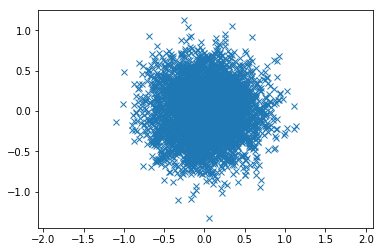

In [81]:
import matplotlib.pyplot as plt
x,y = np.random.multivariate_normal([0,0],0.1*np.eye(2),5000).T
plt.plot(x,y,'x'); plt.axis('equal'); plt.show()

<class 'netCDF4._netCDF4.Group'>
group /000035:
    dimensions(sizes): Delay(128), Doppler(20), DateTimeTrack(722)
    variables(dimensions): float64 Delay(Delay), float64 Doppler(Doppler), float64 IntegrationMidPointTime(DateTimeTrack), uint16 DDM(DateTimeTrack,Doppler,Delay)
    groups: 

In [92]:
tds.metagrp.groups[tds.group].variables['AntennaTemperature'][100].data

array(295.14362, dtype=float32)

In [98]:
T_noise_receiver = 225
k_b = 1.38e-23 # J/K
y_noise = 1/sim_config.coherent_integration_time*k_b*T_noise_receiver
print(y_noise)

3.105e-18
